
[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Generated synthetic audio: (300, 32000) (300,)
✅ Feature matrix shape: (300, 80)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,819 (73.51 KB)

 Trainable params: 18,819 (73.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.4062 - loss: 15.6510 - val_accuracy: 0.9167 - val_loss: 0.3031
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6146 - loss: 7.1750 - val_accuracy: 1.0000 - val_loss: 0.0144
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7396 - loss: 2.9500 - val_accuracy: 1.0000 - val_loss: 9.5355e-06
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8177 - loss: 2.0529 - val_accuracy: 1.0000 - val_loss: 3.2608e-06
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8958 - loss: 1.0858 - val_accuracy: 1.0000 - val_loss: 1.7385e-08
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9271 - loss: 0.5984 - val_accuracy: 1.0000 - val_loss: 9.5862e-07
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9271 - loss: 0.5148 - val_accuracy: 1.0000 - val_loss: 7.4506e-09
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9844 - loss: 0.2022 - v

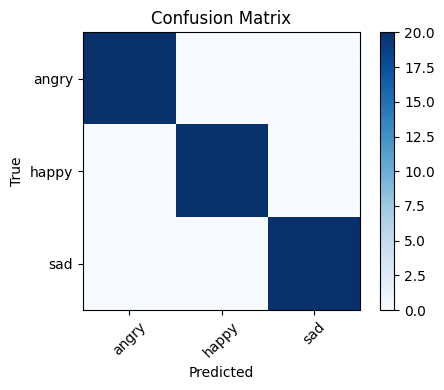

✅ Model saved as emotion_recognition_demo.h5


In [5]:
# =========================================
# Task 2: Emotion Recognition from Speech (Demo)
# Works directly in Jupyter Notebook
# =========================================

# Install required packages (run once)
!pip install -q librosa soundfile tensorflow scikit-learn numpy pandas matplotlib

# ---- Imports ----
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ---- Parameters ----
sr = 16000         # Sampling rate
duration = 2.0     # Duration in seconds
n_mfcc = 40        # Number of MFCCs

# ---- Step 1: Generate synthetic audio ----
np.random.seed(42)
emotions = ['happy', 'sad', 'angry']
samples_per_class = 100  # fewer for faster demo

def make_sine(freq, length, sr):
    """Generate a sine wave with small random noise."""
    t = np.linspace(0, length, int(sr*length), endpoint=False)
    signal = 0.5 * np.sin(2*np.pi*freq*t)
    signal += 0.01 * np.random.randn(len(t))
    return signal.astype(np.float32)

audio_data = []
labels = []

for emo in emotions:
    for _ in range(samples_per_class):
        if emo == 'happy':
            freq = np.random.uniform(220, 400)
        elif emo == 'sad':
            freq = np.random.uniform(80, 200)
        else:  # angry
            freq = np.random.uniform(400, 800)
        audio_data.append(make_sine(freq, duration, sr))
        labels.append(emo)

audio_data = np.array(audio_data)
labels = np.array(labels)
print("✅ Generated synthetic audio:", audio_data.shape, labels.shape)

# ---- Step 2: Extract MFCC features ----
def extract_mfcc(signal, sr, n_mfcc=40):
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    # mean + std per coefficient
    return np.concatenate([mfcc.mean(axis=1), mfcc.std(axis=1)])

X = np.array([extract_mfcc(sig, sr, n_mfcc) for sig in audio_data])
y = labels
print("✅ Feature matrix shape:", X.shape)

# ---- Step 3: Encode labels + split ----
le = LabelEncoder()
y_enc = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# ---- Step 4: Build simple dense neural net ----
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ---- Step 5: Train ----
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    callbacks=[es],
    verbose=1
)

# ---- Step 6: Evaluate ----
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

y_pred = np.argmax(model.predict(X_test), axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ---- Step 7: Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(emotions)), le.classes_, rotation=45)
plt.yticks(np.arange(len(emotions)), le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# ---- Step 8: Save model ----
model.save("emotion_recognition_demo.h5")
print("✅ Model saved as emotion_recognition_demo.h5")